In [ ]:
import geopandas as gpd
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import mapclassify as mc
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle

In [ ]:
# read the world geometry data exported form Task 1
data = gpd.read_file('Task-2-Data/Task-2-Exported-Geomeries.gpkg')
# get the GDP per capita
data['GDP per capita']= 1000000* data['GDP_MD'] / data['POP_EST']
# replace nan with 0
data['GDP per capita'] = data['GDP per capita'].fillna(0)
# define the crs
crs= ccrs.EckertIV()
# project the data
data=data.to_crs(crs)

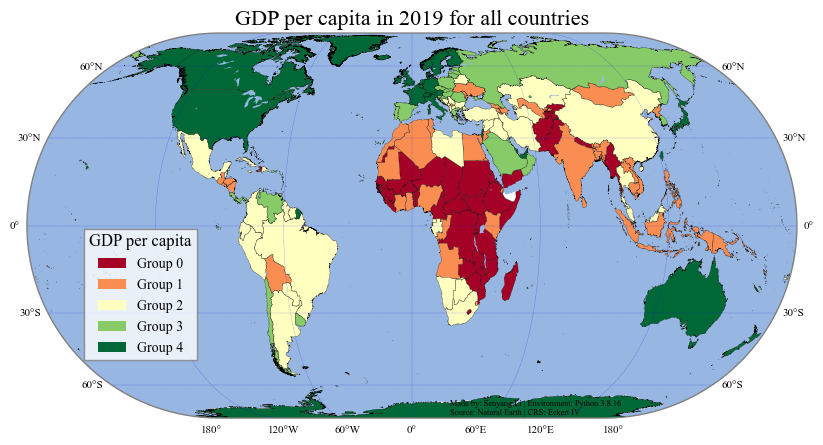

In [38]:
# establish a canvas
fig = plt.figure(figsize=(10, 5))
# set up and ax object
ax = fig.add_subplot(1, 1, 1, projection=crs)

# Set the extent and crs of the map
ax.set_global()
# Set parameters of the ax
for spine in ax.spines.values():
    spine.set_linewidth(1)
    spine.set_color('grey')

# using mapclassify to classify the data to be 5 classes using Quantiles
class_number = 5
classifier = mc.Quantiles(data['GDP per capita'], k=class_number)
classifications = np.array(classifier.yb)

# plot the classification
cmap = plt.get_cmap('RdYlGn', class_number)
for i in range(class_number):
    subset = data[classifications == i]
    ax.add_geometries(subset['geometry'], crs, facecolor=cmap(i), edgecolor='black', linewidth=0.2)

# add the ocean and lakes
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.LAKES)

#set title
ax.set_title("GDP per capita in 2019 for all countries")
ax.title.set_fontname('times new roman')
ax.title.set_fontsize(16)

# set the legend
# create a list of color labels for the legend
color_labels = ['Group {}'.format(i) for i in range(class_number)]
# create a list of colored rectangles to use for the legend
rectangles = [Rectangle((0, 0), 1, 1, fc=cmap(i)) for i in range(class_number)]
# create the legend with the colored rectangles
legend = ax.legend(rectangles, color_labels, title='GDP per capita', bbox_to_anchor=(0.23,0.51), 
fontsize=10, prop='times new roman', frameon=True, facecolor='white', edgecolor='grey', fancybox=False)
legend.get_title().set_fontname('times new roman')
legend.get_title().set_fontsize(12)

# set the gridlines
gl=ax.gridlines(draw_labels=True,linestyle=":",linewidth=0.25,color='b')
gl.top_labels=False                                                   
gl.xlabel_style={'size':8,'fontproperties':'times new roman'}                          
gl.ylabel_style={'size':8,'fontproperties':'times new roman'}

# set the metadata
# Create a text box
text_str = 'Made by: Senyang Li | Environment: Python 3.8.16\nSource: Natural Earth | CRS: Eckert IV'
text_box = ax.text(x=0.55, y=0.008, s=text_str,transform=ax.transAxes,
bbox=dict(facecolor='none', edgecolor='none', pad=5))
text_box.set_fontproperties('times new roman')
text_box.set_fontsize(6)


# show the map
plt.show()